In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 19.9 MB/s eta 0:00:0000:01


In [9]:
# !zip -r yolov8_leaf_diseases_exp_2_dir.zip /kaggle/working/
# !rm -r *

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/yolov8s.pt (deflated 8%)
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/train/ (stored 0%)
  adding: kaggle/working/runs/detect/train/train_batch4141.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/train/val_batch0_pred.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/train/val_batch1_pred.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/train/P_curve.png (deflated 10%)
  adding: kaggle/working/runs/detect/train/R_curve.png (deflated 7%)
  adding: kaggle/working/runs/detect/train/results.png (deflated 9%)
  adding: kaggle/working/runs/detect/train/weights/ (stored 0%)
  adding: kaggle/working/runs/detect/train/weights/last.pt (deflated 8%)
  adding: kaggle/working/runs/detect/train/weights/best.pt (deflated 8%)
  adding: kaggle/working/runs/detect/train/val_batch0_labels.jpg (deflated 4%)
  adding: kaggle/working/runs/detec

In [36]:
from collections import Counter
import os
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import cv2
import random
from ultralytics import YOLO

## Training using YOLO v8 nano

In [7]:
model = YOLO("yolov8n.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 52.4MB/s]


In [8]:
# Use the model
model.train(data="/kaggle/input/detecting-diseases-weighted/data.yaml",
            epochs=100,
            batch=64,
            freeze=0)  # freeze=0


Ultralytics YOLOv8.2.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/detecting-diseases-weighted/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=0, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

wandb: Currently logged in as: sudarsaan (mlis-autopilot). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 20.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/detecting-diseases-weighted/train/labels... 2904 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2904/2904 [00:03<00:00, 877.61it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/detecting-diseases-weighted/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/detecting-diseases-weighted/valid/labels... 1416 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1416/1416 [00:01<00:00, 823.25it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/detecting-diseases-weighted/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      16.5G       1.16      3.374      1.517        123        640: 100%|██████████| 46/46 [00:45<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.04it/s]


                   all       1416       3193      0.531      0.584      0.552       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      16.3G     0.9585      1.436      1.308         93        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]


                   all       1416       3193      0.598      0.572      0.612      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      16.2G      1.006      1.286      1.329        124        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]


                   all       1416       3193      0.677      0.379      0.439      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      16.2G      1.013      1.228      1.345         88        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]


                   all       1416       3193      0.521      0.591      0.557      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      16.2G      0.982      1.126      1.324        105        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]


                   all       1416       3193      0.611      0.633      0.641      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      16.2G     0.9539      1.035      1.298        104        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]

                   all       1416       3193       0.67       0.68      0.702      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      16.2G     0.9309     0.9963      1.281         97        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.741        0.7      0.743      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      16.2G     0.9246     0.9785      1.273         98        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.764      0.716      0.774      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      16.2G     0.9019      0.929      1.259        123        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.772      0.736      0.789      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      16.2G     0.8833     0.8893      1.254        130        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.09it/s]

                   all       1416       3193      0.823      0.751      0.824        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      16.2G     0.8606      0.872      1.232         90        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.803      0.773      0.824      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      16.2G     0.8504     0.8407      1.234        109        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.761      0.771      0.803       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      16.2G     0.8516     0.8299      1.224         91        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.799      0.769       0.81      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      16.2G     0.8366     0.8175      1.224        109        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.755      0.792      0.808      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      16.2G     0.8371     0.7917      1.214        114        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.777      0.805      0.836      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      16.2G     0.8252     0.7807      1.212         82        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.818       0.77      0.833      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      16.2G     0.8114     0.7602      1.197         86        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.824      0.815      0.846      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      16.2G     0.8033     0.7431      1.191        102        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.843      0.804      0.854      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      16.2G     0.7932     0.7398      1.185        100        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193       0.83      0.811      0.858      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      16.2G     0.7874      0.726      1.178        116        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.848      0.828      0.875      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      16.2G     0.7806     0.7196      1.171        116        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.829      0.846      0.867      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      16.2G      0.772      0.699      1.168        124        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.799      0.812      0.855      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      16.2G     0.7706     0.6944      1.173        106        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.852       0.82      0.873      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      16.2G     0.7754     0.6777      1.175         87        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.803      0.834       0.86      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      16.2G     0.7693     0.6821      1.173        109        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.851      0.825      0.875      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      16.2G     0.7542     0.6593      1.159        101        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.882       0.83      0.889      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      16.2G     0.7525     0.6615      1.164        135        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.865      0.831      0.881      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      16.2G     0.7444     0.6393      1.156         90        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.849      0.849      0.884      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      16.2G      0.747     0.6377      1.153        100        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.851      0.841      0.882      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      16.2G     0.7435     0.6241      1.144        107        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193       0.87       0.85      0.888        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      16.2G     0.7309     0.6241      1.136        104        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.875      0.845      0.889      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      16.2G      0.727     0.6071      1.143         76        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193       0.83      0.859      0.877      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      16.2G      0.716     0.6084      1.129         94        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193       0.85      0.843      0.881      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      16.2G     0.7144     0.5971      1.131         88        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.869      0.846      0.893      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      16.2G     0.7039     0.5879      1.125        131        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193       0.86      0.838      0.881      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      16.2G     0.7103     0.5787      1.122        125        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.15it/s]

                   all       1416       3193      0.881      0.844      0.889      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      16.2G     0.7073     0.5729      1.125         89        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.883      0.869      0.897      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      16.2G     0.6953     0.5622      1.117         88        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.874      0.861      0.896      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      16.2G     0.6845     0.5692      1.113        125        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.879      0.847       0.89      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      16.2G     0.6995      0.572      1.124         93        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.905      0.847        0.9      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      16.2G     0.6909     0.5587      1.118        102        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all       1416       3193      0.873      0.874      0.904      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      16.2G     0.6816     0.5474      1.109        101        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.872       0.88      0.902      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      16.2G     0.6763     0.5449      1.112        114        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.15it/s]

                   all       1416       3193      0.879      0.871      0.904      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      16.2G     0.6773     0.5346      1.108        110        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.888      0.869      0.901      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      16.2G     0.6675      0.533      1.106        105        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.893      0.853      0.902      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      16.2G     0.6809      0.529      1.103        112        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.904      0.848        0.9      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      16.2G      0.657     0.5166      1.094        102        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.883      0.866      0.899      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      16.2G     0.6596     0.5234      1.095         99        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.903      0.865      0.907      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      16.2G     0.6511     0.5147      1.092        105        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.906      0.855      0.908      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      16.2G     0.6458     0.4969      1.089         83        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.897      0.863      0.908      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      16.2G      0.656     0.5047      1.095        110        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193       0.91      0.854      0.902      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      16.2G     0.6415       0.49      1.088         96        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.886      0.879      0.909      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      16.2G     0.6278     0.4909      1.079        129        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.912      0.867      0.911      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      16.2G     0.6369     0.4838      1.083        114        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193       0.89      0.869      0.908      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      16.2G      0.632     0.4783      1.085        117        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.901      0.874      0.908      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      16.2G     0.6359     0.4824      1.081         94        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.906      0.878      0.912      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      16.2G     0.6231     0.4802      1.073        109        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.898      0.888      0.909      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      16.2G     0.6332     0.4726      1.085         93        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.909      0.884      0.911      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      16.2G     0.6128     0.4601      1.073        124        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193       0.91       0.88       0.91      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      16.2G     0.6188     0.4639      1.072        101        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.904      0.885      0.911      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      16.2G     0.6086     0.4605      1.067         79        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193       0.92       0.87       0.91       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      16.2G     0.6044     0.4506       1.06        104        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.912      0.878      0.908      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      16.2G      0.601     0.4507      1.061        119        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.918      0.872       0.91      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      16.2G      0.607     0.4502      1.065         92        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.903      0.878      0.907      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      16.2G     0.5981     0.4452      1.062         84        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193       0.91      0.891       0.91      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      16.2G      0.596      0.435      1.057         94        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.15it/s]

                   all       1416       3193      0.915      0.873      0.914      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      16.2G     0.5877     0.4381      1.055        114        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.914      0.881      0.913      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      16.2G     0.5875     0.4357      1.057        107        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.915      0.881      0.915       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      16.2G     0.5823     0.4307      1.052         93        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.909      0.882      0.914      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      16.2G     0.5791     0.4268      1.052        119        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.907      0.895      0.917       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      16.2G     0.5731     0.4173      1.044         91        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.909      0.887      0.912      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      16.2G     0.5723      0.413      1.046         88        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.913      0.887      0.915      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      16.2G     0.5611     0.4078      1.041        102        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.907      0.885      0.912      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      16.2G     0.5642      0.412      1.046         94        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193       0.92       0.88      0.912      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      16.2G     0.5719     0.4081      1.045         75        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.909      0.894      0.917      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      16.2G     0.5549     0.4005      1.037        102        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.915      0.879      0.914      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      16.2G     0.5567     0.4028      1.038        101        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.899      0.895      0.914      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      16.2G      0.551     0.4022       1.04         87        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.936      0.866      0.915      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      16.2G     0.5416     0.3907      1.027        122        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.918      0.882      0.919      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      16.2G     0.5487     0.3878      1.036        113        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.923      0.888      0.919      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      16.2G     0.5351     0.3811      1.022         88        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.927      0.878      0.918      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      16.2G     0.5333     0.3862      1.027        107        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.916      0.886      0.918      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      16.2G      0.548     0.3847       1.03         83        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.916      0.892      0.918      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      16.2G     0.5289     0.3801      1.028        104        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.918      0.888      0.919      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      16.2G     0.5237     0.3743      1.024         99        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all       1416       3193      0.918      0.895      0.922      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      16.2G     0.5256     0.3727      1.022        103        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.909      0.899       0.92      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      16.2G      0.526     0.3716      1.024        106        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.917      0.887      0.915      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      16.2G     0.5234     0.3623       1.02         84        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.927      0.882       0.92      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      16.2G     0.5198     0.3614      1.022         87        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.905      0.891      0.919      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      16.2G     0.5196     0.3632      1.021        113        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.918      0.882      0.915      0.776


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      16.2G     0.4293     0.2943     0.9507         46        640: 100%|██████████| 46/46 [00:47<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193      0.906      0.883      0.915      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      16.2G      0.407     0.2561       0.94         37        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.16it/s]

                   all       1416       3193       0.92      0.886       0.92      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      16.2G     0.3976     0.2543     0.9248         42        640: 100%|██████████| 46/46 [00:45<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.921      0.887      0.917      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      16.2G     0.4017     0.2564     0.9392         42        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.916      0.885      0.919      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      16.2G     0.3942      0.246     0.9263         50        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.913      0.891      0.922      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      16.2G     0.3888     0.2439     0.9237         54        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.934      0.878      0.922      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      16.2G     0.3841     0.2412     0.9243         61        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all       1416       3193       0.94      0.873      0.923      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      16.2G     0.3778     0.2362     0.9186         40        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.931      0.881      0.922      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      16.2G     0.3817      0.239     0.9212         55        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all       1416       3193      0.932      0.879      0.922      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      16.2G     0.3727      0.236     0.9157         43        640: 100%|██████████| 46/46 [00:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all       1416       3193      0.926      0.883      0.921      0.787



100 epochs completed in 1.608 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.39s/it]


                   all       1416       3193       0.94      0.873      0.923      0.789
Beans_Angular_LeafSpot         83        277      0.734      0.653      0.693      0.436
            Beans_Rust         97        463      0.868      0.812       0.87      0.634
Strawberry_Angular_LeafSpot        166        193      0.977      0.888      0.977      0.824
Strawberry_Anthracnose_Fruit_Rot         47         85      0.975      0.901      0.952      0.743
Strawberry_Blossom_Blight        104        161      0.993          1      0.995      0.916
  Strawberry_Gray_Mold        192        200      0.945      0.861      0.953      0.775
  Strawberry_Leaf_Spot        199        779       0.96       0.85      0.936      0.876
Strawberry_Powdery_Mildew_Fruit         77        151      0.921      0.788      0.859      0.739
Strawberry_Powdery_Mildew_Leaf        155        584       0.92      0.733      0.866      0.787
         Tomato_Blight        100        100       0.99       0.99      0.9

lr/pg0,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▃▁▅▆▇▆▇▇▇▇█▇████████████████████████████
metrics/mAP50-95(B),▃▁▄▅▆▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████
metrics/precision(B),▁▃▃▅▆▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇█▇█▇██▇████▇████
metrics/recall(B),▄▁▅▆▆▆▆▇▇▇▇▇▇▇▇▇██▇▇▇███████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▆▆▅▅▅▅▅▅▄▄▄▄▄▄▄▄▄▃▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ba7cb07a320>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

## Inference and Visualization

In [3]:
weights_path = '/kaggle/working/runs/detect/train/weights/last.pt'
model = YOLO(weights_path)  # Load the model with the saved weights

In [38]:
def plot_ground_truth(image_path, label_path, class_index_name_dict):
    image = Image.open(image_path)

# Print ground truth labels and draw bounding boxes
#     print('LABELS : ')
    draw = ImageDraw.Draw(image)
    # Specify the font size
    font_size = 25  # Adjust this value to increase/decrease the font size
    font = ImageFont.truetype("/kaggle/input/arial-ttf/arial.ttf", font_size)
    with open(label_path, 'r') as file:
        for line in file:
            components = line.split()
            index = int(components[0])
            class_name = class_index_name_dict.get(index, "Unknown")
#             print(class_name)

            # Extract bounding box coordinates and convert to pixel values
            x_center, y_center, width, height = map(float, components[1:])
            img_width, img_height = image.size
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height
            x0 = x_center - width / 2
            y0 = y_center - height / 2
            x1 = x_center + width / 2
            y1 = y_center + height / 2

            # Draw the bounding box
            draw.rectangle([x0, y0, x1, y1], outline="red", width=3)
            draw.text((x0, y0), class_name, fill="red", font=font)
            
#     plt.imshow(np.array(image))
#     plt.show()
    return np.array(image)

/kaggle/input/detecting-diseases-weighted/valid/labels/blossom_blight157_jpg.rf.50b3a4f32de5cdb474570ff03f9abd58.txt

image 1/1 /kaggle/input/detecting-diseases-weighted/valid/images/blossom_blight157_jpg.rf.50b3a4f32de5cdb474570ff03f9abd58.jpg: 640x640 1 Strawberry_Blossom_Blight, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


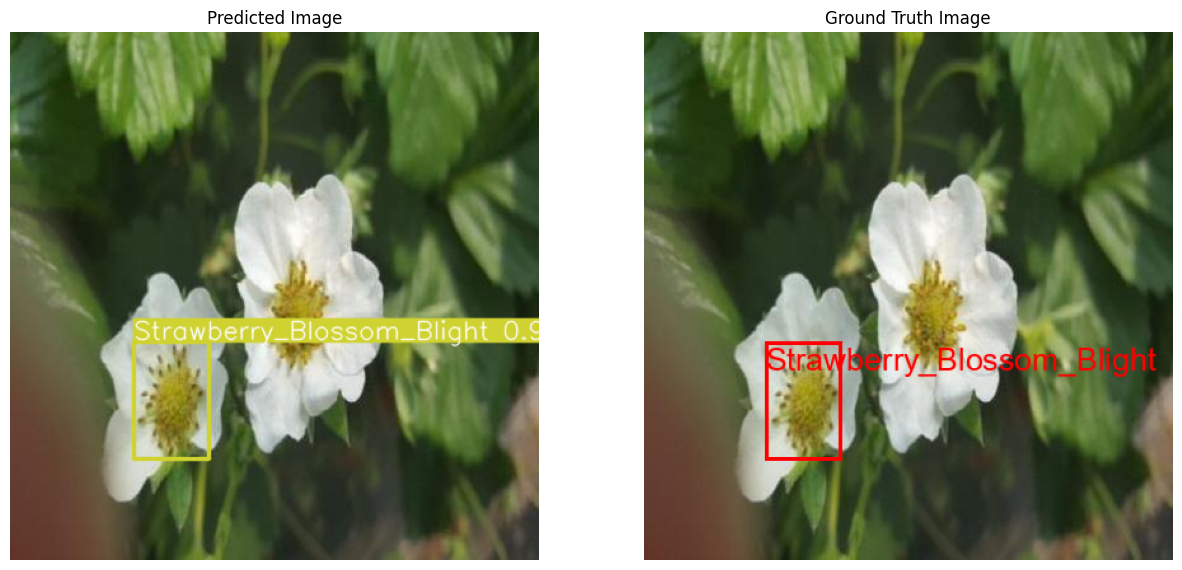

In [43]:
img_prefix = '/kaggle/input/detecting-diseases-weighted/valid/images'
txt_prefix = '/kaggle/input/detecting-diseases-weighted/valid/labels'

file_name = random.sample(os.listdir('/kaggle/input/detecting-diseases-weighted/valid/images'), k=1)[0]
txt_filename = os.path.join(txt_prefix, file_name[:-4]+'.txt')
ground_truth_image = plot_ground_truth(os.path.join(img_prefix,file_name),
                 txt_filename,
                  model.names)
print(txt_filename)
# print('LABELS : ')
with open(txt_filename, 'r') as file:
    for line in file:
        index = line.split()[0]
        class_name = model.names.get(int(index), "Unknown")
#         print(class_name)
#     print(f.read())

# print('\n')
results = model.predict(f"{os.path.join(img_prefix,file_name)}")
predicted_image = results[0].plot(show=False)
predicted_image_rgb = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)
# results[0].show()
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot the predicted image
axes[0].imshow(predicted_image_rgb)
axes[0].set_title('Predicted Image')
axes[0].axis('off')

# Plot the ground truth image
axes[1].imshow(ground_truth_image)
axes[1].set_title('Ground Truth Image')
axes[1].axis('off')
plt.axis("off")
plt.show()